El programa del ejercicio 3 que calculaba las palabras más utilizadas se puede reescribir de forma mucho más sencilla utilizando un `pandas`.

Para ello, en lugar de devolver un diccionario en la función `words_to_frequencies` se puede devolver una `Series` de Pandas.

In [1]:
import numpy
import pandas

In [5]:
# Leemos el fichero

lyrics = open("data/despacito.txt", "r").read()

In [3]:
def split_into_words(lyrics):
    """
    Split a string into lowercase words, removing all punctuation characters,
    returning the result.
    """
    result = []
    for word in lyrics.lower().split():  # lower() convierte las palabras en minusculas
        word = word.strip(',.;()"!')  # strip() elimina del incio y del final los caracteres que le pasemos
        result.append(word)
    return result

In [7]:
def words_to_frequencies(lyrics):
    """
    Convert words into frequencies. Return a pandas.Series whose keys are the
    words with the frequency as the value
    """
    freqs = {}
    for word in lyrics:
        if word in freqs:
            freqs[word] += 1
        else:
            freqs[word] = 1
        # Alternativa al if anterior
        # freqs[word] = freqs.get(word, 0) + 1
        # Otra alternativa
        # freqs.setdefault(word, 0)
        # freqs[word] += 1
    #return freqs
    return pandas.Series(freqs)

In [11]:
def get_more_often_user_words(frequencies, threshold=10):
    """
    Return a list of the words that are used more often, above
    the *optional* threshold. If no threshold is passed, use 10.
    """
    
    #pass
    return frequencies[frequencies > threshold]

In [12]:
words_clean = split_into_words(lyrics)

freqs = words_to_frequencies(words_clean)

print("Palabras más frecuentes con más de 10 apariciones.")
print(get_more_often_user_words(freqs))
print("\n")
print("Palabras más frecuentes con más de 10 apariciones.")
print(get_more_often_user_words(freqs, threshold=5))

Palabras más frecuentes con más de 10 apariciones.
que       22
tu        18
quiero    12
a         15
dtype: int64


Palabras más frecuentes con más de 10 apariciones.
oh            6
que          22
tu           18
el            6
y             9
de            9
despacito    10
quiero       12
te            8
a            15
sube         10
mi            6
tus           8
favoritos     9
pasito        8
poquito       8
dtype: int64


In [13]:
%matplotlib inline

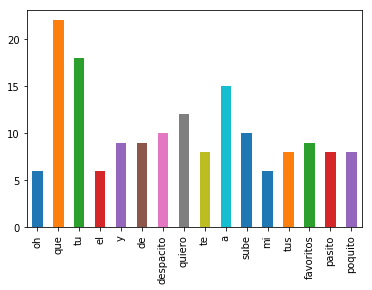

In [15]:
most = get_more_often_user_words(freqs, threshold=5).plot(kind="bar")